In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [18]:
moisture_data = pd.read_csv('moisture.csv', parse_dates=['Date'])
temperature_data = pd.read_csv('temparature.csv', parse_dates=['Date'])
diameter_data = pd.read_csv('diameter.csv', parse_dates=['Date'])

In [22]:
# Merge the datasets
moisture_data.columns = ['Date','Moisture_I0', 'Moisture_I3', 'Moisture_I5']
temperature_data.columns = ['Date','Temp_I0', 'Temp_I3', 'Temp_I5' ]
diameter_data.columns = ['Date', 'Diameter_I0', 'Diameter_I3', 'Diameter_I5']

merged_data = pd.merge(moisture_data, temperature_data, on='Date', how='inner')
merged_data = pd.merge(merged_data, diameter_data, on='Date', how='inner')

In [23]:
# Feature engineering
merged_data['DayOfYear'] = merged_data['Date'].dt.dayofyear

In [24]:
# Reshape data for ML
data_list = []
for i in ['I0', 'I3', 'I5']:
    merged_df = merged_data[['Moisture_' + i, 'Temp_' + i, 'Diameter_' + i, 'DayOfYear']].copy()
    merged_df.columns = ['Moisture', 'Temperature', 'Diameter', 'DayOfYear']
    merged_df['IrrigationLevel'] = i
    data_list.append(merged_df)

final_data = pd.concat(data_list, axis=0)

In [25]:
final_data["DaysAfterSeed"] = final_data["DayOfYear"] - 62
final_data.drop(columns=["DayOfYear"], inplace=True)

In [26]:
# Separate features and target
X = final_data[['Moisture', 'Temperature', 'DaysAfterSeed', 'IrrigationLevel']]
y = final_data['Diameter']

In [27]:
# Encode categorical data
X = pd.get_dummies(X, columns=['IrrigationLevel'])

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:

model = GradientBoostingRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [31]:
# Predict for the test set
predictions = model.predict(X_test)

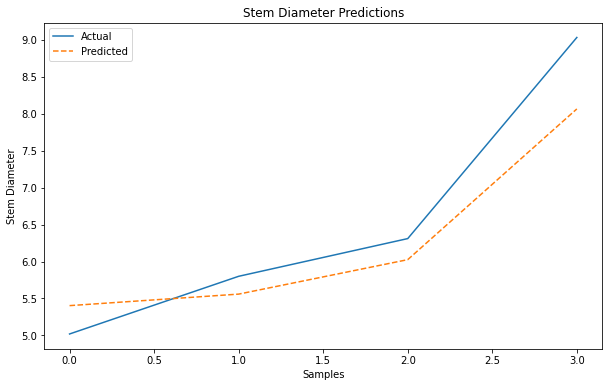

In [32]:
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.legend()
plt.title('Stem Diameter Predictions')
plt.xlabel('Samples')
plt.ylabel('Stem Diameter')
plt.show()


In [44]:
# Predict for all 74 days
all_predictions = model.predict(X)
data['Predicted_Diameter'] = all_predictions

ValueError: Length of values (18) does not match length of index (74)

In [45]:
# Save predictions to file
data.to_csv('predicted_stem_diameter.csv', index=False)
print("Predictions saved to 'predicted_stem_diameter.csv'.")

Predictions saved to 'predicted_stem_diameter.csv'.
